# Arboles de Decisión

- Uno de los grandes problemas que tenemos al implementar un modelo de aprendizaje de máquina dentro de un contexto empresarial es que la parte de negocio/administrativa, necesita conocer como es que el modelo toma decisiones a partir de que clasifica ciertas instancias o a partir de que predice un cierto valor.
- Esto es complicado si se usan las **redes neuronales artificiales(técnicas de caja negra)**.
- Tenemos tecnicas de caja blanca y estamos hablando de los **arboles de decision**, que son un conjunto de reglas si-entonces que, se pueden explicar fácilmente a personas que estan fuera del contexto de ML.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

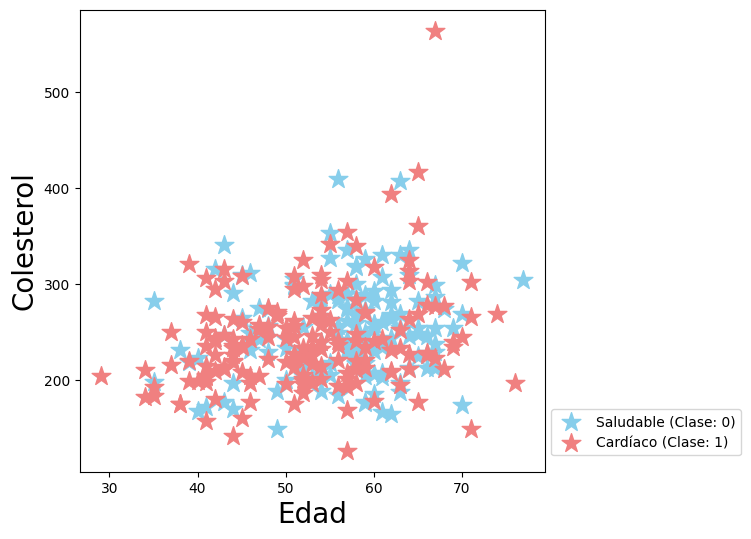

In [19]:
pacientes = pd.read_csv("./pacientes.csv")

saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]

plt.figure(figsize=(6, 6))
plt.xlabel("Edad", fontsize = 20.0)
plt.ylabel("Colesterol", fontsize = 20.0)
plt.scatter(saludables["edad"], saludables["colesterol"],
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"], cardiacos["colesterol"],
            label="Cardíaco (Clase: 1)", marker="*", c="lightcoral", s=200)
plt.legend(bbox_to_anchor=(1, 0.15))
plt.show()

# Emtropía:

#### Promedio de información almacenada en una variable aleatoria

In [27]:
from scipy.stats import entropy
from math import log

# Hagamos un pequeño calculo de loaritmo
#print(log(8, 2))

#print(entropy([1/2, 1/2], base=2))
#print(entropy([6/10, 4/10], base=2))
#print(entropy([10/10, 0/10], base=2))

edades = pd.Series([40, 30, 20, 50])
colesterol = pd.Series([100, 110, 100, 110])

print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
Name: count, dtype: float64
100    0.5
110    0.5
Name: count, dtype: float64
2.0
1.0


# Datos de Entrenamiento y Prueba

In [33]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"], 
    test_size=0.30)

# Creación del Arbol de Decisión

0.6
|--- Edad <= 56.50
|   |--- Colesterol <= 271.50
|   |   |--- Colesterol <= 164.50
|   |   |   |--- class: 1
|   |   |--- Colesterol >  164.50
|   |   |   |--- Colesterol <= 173.50
|   |   |   |   |--- class: 0
|   |   |   |--- Colesterol >  173.50
|   |   |   |   |--- Colesterol <= 257.00
|   |   |   |   |   |--- Colesterol <= 254.50
|   |   |   |   |   |   |--- Colesterol <= 249.50
|   |   |   |   |   |   |   |--- Colesterol <= 248.00
|   |   |   |   |   |   |   |   |--- Edad <= 55.50
|   |   |   |   |   |   |   |   |   |--- Edad <= 54.50
|   |   |   |   |   |   |   |   |   |   |--- Colesterol <= 176.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Colesterol >  176.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- Edad >  54.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Edad >  55.50
|   |   |   |   |   | 

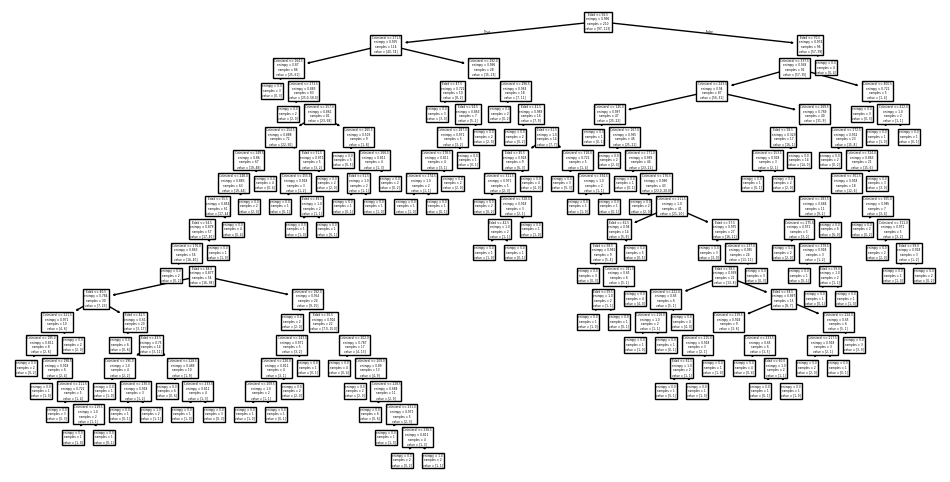

In [37]:
from sklearn import tree

# Generamos el modelo
arbol_decision = tree.DecisionTreeClassifier(
    criterion = "entropy"
    #max_depth = 2  # hace referencia a la profundidad del arbol
)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

# Conocer que tan bueno fue nuestro modelo
accuracy = arbol_decision.score(datos_prueba, clase_prueba)
print(accuracy)

# Generando una representacion en texto
print(tree.export_text(arbol,
                       feature_names = ["Edad", "Colesterol"]))

# Generando una representación visual
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol,
               feature_names = ["Edad", "Colesterol"])

plt.show()

# Clasificación de pacientes nuevos

In [36]:
print("Nuevo paciente", arbol_decision.predict([[70, 150]]))

Nuevo paciente [0]


/home/zombits/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
